In [77]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

def pretty_plot(df, ylabel, logy=False):
    fig = plt.figure(figsize=(10, 7))
    ax = df.plot(logy=logy, ax = plt.gca())
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=70)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.gcf().autofmt_xdate()
    return ax

In [78]:
data_start_date = dt.date(year=2020, month=3, day=2)
n_days_since_start = (dt.date.today() - data_start_date).days + 1

reference = pd.DataFrame(
    {'days_since_start': range(n_days_since_start)}, 
    index=pd.date_range(data_start_date, dt.date.today())
)

In [82]:
diagnosed = pd.read_csv('../consolidated/diagnosed.csv', index_col=0, header=0)
icu = pd.read_csv('../consolidated/icu.csv', index_col=0, header=0)
deaths = pd.read_csv('../consolidated/deaths.csv', index_col=0, header=0)
hospitalized = pd.read_csv('../consolidated/hospitalized.csv', index_col=0, header=0)

diagnosed = diagnosed.merge(reference, left_index=True, right_index=True, how='right')
icu = icu.merge(reference, left_index=True, right_index=True, how='right')
deaths = deaths.merge(reference, left_index=True, right_index=True, how='right')
hospitalized = hospitalized.merge(reference, left_index=True, right_index=True, how='right')

most_impacted_ccaa = diagnosed.tail(1).iloc[0].sort_values(ascending=False).head(5)

In [83]:
def plot_aligned_metrics(k, m, ccaas):
    rates = [0.2, 0.3, 0.4, 0.5]
    for ccaa in ccaas:
        diagnosed[f'{ccaa}-days-since-{k}-{metric}'] = diagnosed['days_since_start'] -\
            diagnosed['days_since_start'].loc[diagnosed[ccaa] >= k].iloc[0]

    fig = plt.figure(figsize=(10, 7))
    ax = plt.gca()

    for ccaa in ccaas:
        subset = diagnosed[[ccaa, f'{ccaa}-days-since-{k}-{metric}']]
        subset = subset.loc[subset[f'{ccaa}-days-since-{k}-{metric}'] >= 0]
        ax.semilogy(subset[f'{ccaa}-days-since-{k}-{metric}'], subset[ccaa], '-x', label=ccaa)

    for rate in rates:
        x = range(0, int(ax.get_xlim()[1]))
        y = k * np.power(1 + rate, x)
        ax.semilogy(x, y, '--', label=f'{(rate*100):.0f}% DoD growth')

    ax.set_xticklabels(x)

    plt.title('COVID-19 Evolution in 5 most impacted Autonomous Regions (CCAA)')
    plt.xlabel(f'Days since 100 cases ({metric})')
    plt.ylabel(f'# of {metric}')
    _ = plt.legend()

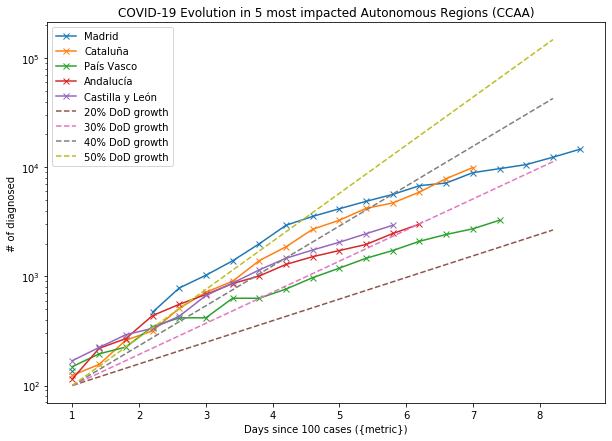

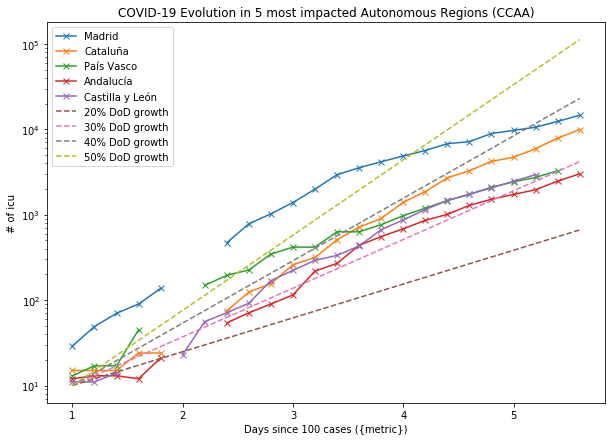

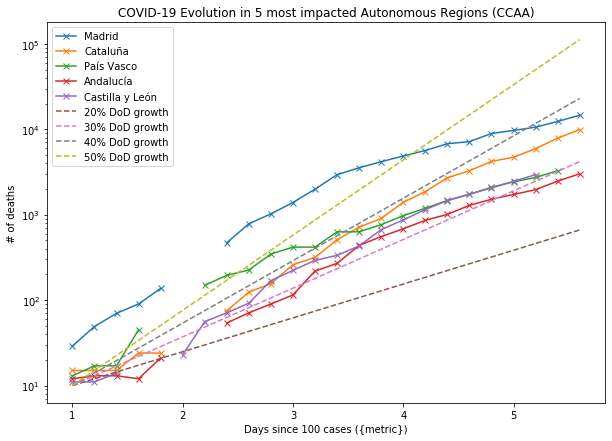

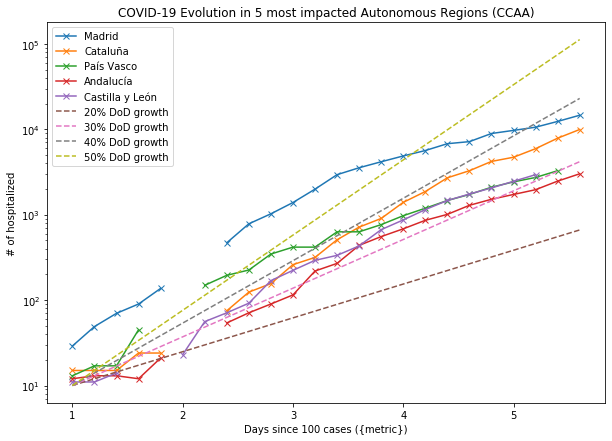

In [85]:
thresholds = [100, 10, 10, 10]
metrics = ['diagnosed', 'icu', 'deaths', 'hospitalized']

for metric, threshold in zip(metrics, thresholds):
    plot_aligned_metrics(threshold, metric, most_impacted_ccaa.index)

Text(0, 0.5, '% CFR (deaths/diagnosed)')

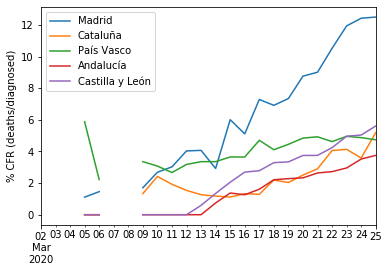

In [90]:
cfr = (deaths/diagnosed * 100)[most_impacted_ccaa.index]
cfr.plot()
plt.ylabel('% CFR (deaths/diagnosed)')

Text(0, 0.5, '% ICU admissions/diagnosed')

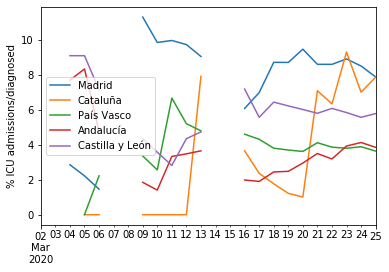

In [94]:
cir = (100*icu/diagnosed)[most_impacted_ccaa.index]

cir.plot()
plt.ylabel('% ICU admissions/diagnosed')

Text(0, 0.5, '% Hospitalized/diagnosed')

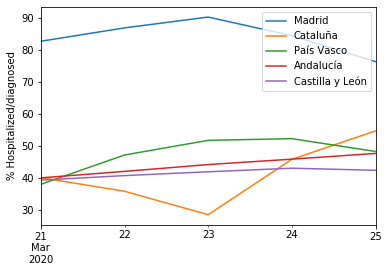

In [101]:
chr = (100*hospitalized/diagnosed)[most_impacted_ccaa.index]

chr.loc[chr.index >= '2020-03-21'].plot()
plt.ylabel('% Hospitalized/diagnosed')

In [87]:
hospitalized

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla La Mancha,Castilla y León,Cataluña,Ceuta,C. Valenciana,Extremadura,Galicia,Madrid,Melilla,Murcia,Navarra,País Vasco,La Rioja,days_since_start
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
